### Charge Structure Factor

In [1]:
using JLD, Plots, LaTeXStrings

In [2]:
data_ce = JLD.load("../data/CqCE_Lx6Ly6_N46_U2.jld")
β = data_ce["beta"];
Cq_ce_val = data_ce["Cq_val"]
Cq_ce_err = data_ce["Cq_err"]

data_gce = JLD.load("../data/CqGCE_Lx6Ly6_N46_U2.jld")
Cq_gce_val = data_gce["Cq_val"]
Cq_gce_err = data_gce["Cq_err"];

In [3]:
# heatmap cell elements
L = length(Cq_gce_val)
δCq = zeros(Float64, L, L)

for i in 1 : L
    for j in 1 : L
        δCq[j, i] = abs(Cq_ce_val[i] - Cq_gce_val[j])
    end
end

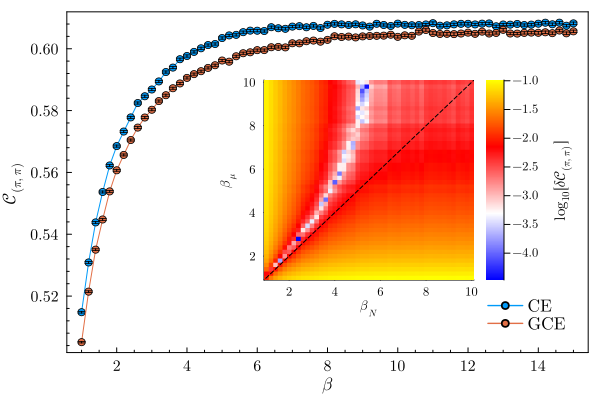

In [4]:
# Plots
plt = plot(
    β, Cq_ce_val, yerror = Cq_ce_err,
    marker = (:circle, 4), 
    xminorticks=4, yminorticks=5,
    xlabel=L"\beta", ylabel=L"\mathcal{C}_{(\pi, \pi)}", 
    label="CE", 
    fontfamily="Computer Modern", 
    legendfontsize = 11,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, 
    grid=:false, 
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    β, Cq_gce_val, yerror = Cq_gce_err,
    marker = (:circle, 4),
    label="GCE"
)

# inset plot
heatmap!(
    plt,
    β[1:46], β[1:46], log10.(δCq[1:46, 1:46]),
    xlabel=L"\beta_{N}", ylabel=L"\beta_{\mu}",
    c=cgrad([:blue, :white, :red, :yellow]),
    colorbar_title = "\n" * L"\log_{10}[\delta \mathcal{C}_{(\pi, \pi)}]",
    inset=bbox(0.44, 0.20, 0.45, 0.5),
    guidefontsize = 9,
    subplot=2
)

Plots.abline!(
    1, 0,
    line=(:dash, :black), 
    label=nothing,
    subplot=2
)

In [5]:
savefig("../figures/Cq_Lx6Ly6_U2_N46.pdf")
savefig("../figures/Cq_Lx6Ly6_U2_N46.svg")

"/Users/agdelma/Dropbox/UTK/Projects/AFQMCCanonical/Code/release/figures/Cq_Lx6Ly6_U2_N46.svg"